In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import  LinearRegression

In [2]:
retail_sale = pd.read_csv('./us-retail-sales.csv', parse_dates=['Month'],index_col='Month').to_period('D')

retail_sale.head(15)

FileNotFoundError: [Errno 2] No such file or directory: './us-retail-sales.csv'

In [5]:
food_sales = retail_sale.loc[:,'FoodAndBeverage']
auto_sales = retail_sale.loc[:,'Automobiles']

[Text(0.5, 1.0, 'Us food and beverage sales '),
 Text(0, 0.5, 'millons of dollars')]

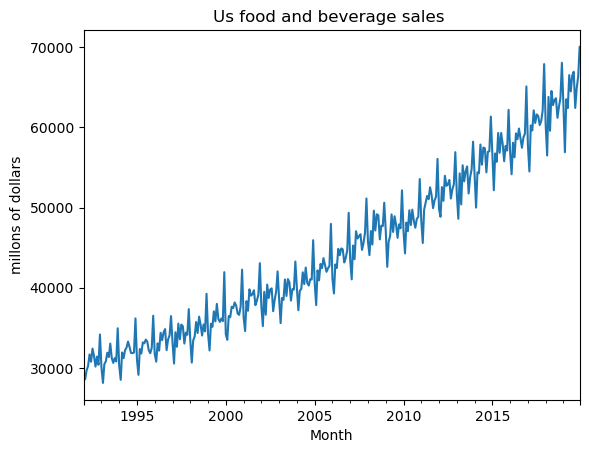

In [6]:
ax = food_sales.plot()
ax.set(title = "Us food and beverage sales ", ylabel = "millons of dollars")

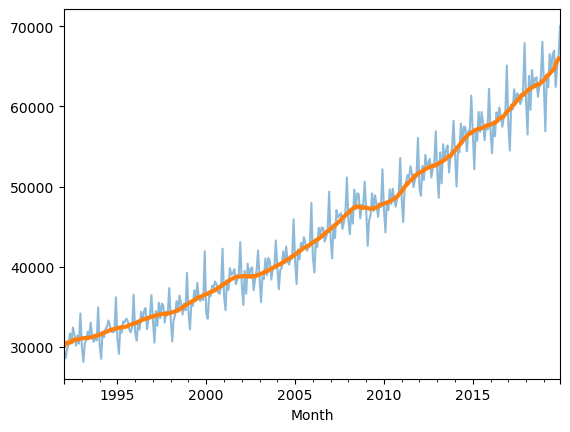

In [7]:
trend = food_sales.rolling(
    window=12,
    center=True,
    min_periods=6
).mean()

ax = food_sales.plot(alpha = 0.5)
ax = trend.plot(ax = ax, linewidth = 3)

In [8]:
dtype = {
    'store_nbr': 'category',
    'family': 'category',
    'sales': 'float32',
    'onpromotion': 'uint64',
}

store_sales = pd.read_csv("./train.csv",dtype= dtype,parse_dates=['date'],infer_datetime_format=True,)


C:\Users\91972\AppData\Local\Temp\ipykernel_17880\3831603558.py:8: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  store_sales = pd.read_csv("./train.csv",dtype= dtype,parse_dates=['date'],infer_datetime_format=True,)


In [9]:
store_sales.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [10]:
store_sales = store_sales.set_index('date').to_period('D')
store_sales.head()

,id,store_nbr,family,sales,onpromotion
date,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.0,0
2013-01-01,1,1,BABY CARE,0.0,0
2013-01-01,2,1,BEAUTY,0.0,0
2013-01-01,3,1,BEVERAGES,0.0,0
2013-01-01,4,1,BOOKS,0.0,0


In [11]:
store_sales = store_sales.set_index(['store_nbr','family'], append=True)
store_sales.head()

id  sales  onpromotion
date       store_nbr family                            
2013-01-01 1         AUTOMOTIVE   0    0.0            0
                     BABY CARE    1    0.0            0
                     BEAUTY       2    0.0            0
                     BEVERAGES    3    0.0            0
                     BOOKS        4    0.0            0

In [12]:
average_sales = store_sales.groupby('date').mean()['sales']
average_sales.head()

date
2013-01-01      1.409438
2013-01-02    278.390808
2013-01-03    202.840195
2013-01-04    198.911163
2013-01-05    267.873260
Freq: D, Name: sales, dtype: float32

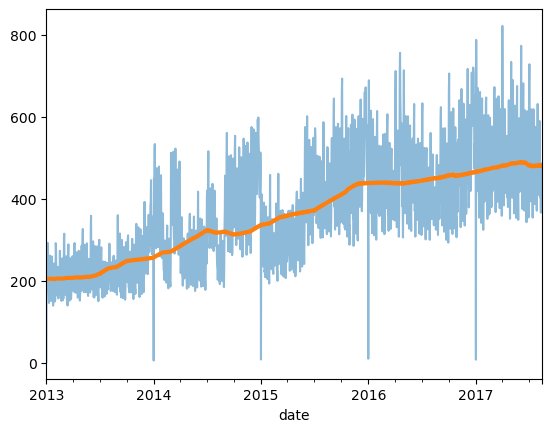

In [14]:
trend = average_sales.rolling(
    window = 365,
    center = True,
    min_periods  = 183,
).mean()

ax = average_sales.plot(alpha = 0.5)
ax = trend.plot(ax = ax , linewidth = 3)

In [16]:
from statsmodels.tsa.deterministic import DeterministicProcess

y = average_sales.copy()

dp = DeterministicProcess(index= y.index , order = 3)

X = dp.in_sample()

X_fore = dp.out_of_sample(steps=90)

In [17]:
X.head()

,trend,trend_squared,trend_cubed
date,,,
2013-01-01,1.0,1.0,1.0
2013-01-02,2.0,4.0,8.0
2013-01-03,3.0,9.0,27.0
2013-01-04,4.0,16.0,64.0
2013-01-05,5.0,25.0,125.0


In [18]:
model = LinearRegression()
model.fit(X,y)

y_pred = pd.Series(model.predict(X), index=X.index)

In [19]:
y_pred.head()

date
2013-01-01    185.024593
2013-01-02    185.199625
2013-01-03    185.374865
2013-01-04    185.550314
2013-01-05    185.725971
Freq: D, dtype: float64

In [20]:
y_fore = pd.Series(model.predict(X_fore), index=X_fore.index)
y_fore.head()

2017-08-16    482.862720
2017-08-17    482.866985
2017-08-18    482.870839
2017-08-19    482.874280
2017-08-20    482.877308
Freq: D, dtype: float64

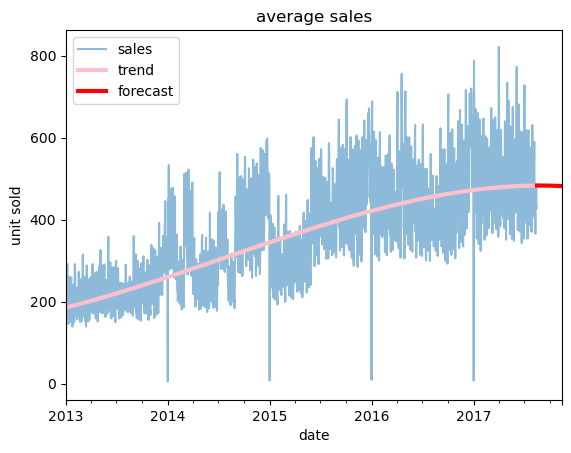

In [22]:
ax = y.plot(alpha = 0.5 , title = 'average sales', ylabel = 'unit sold')
ax = y_pred.plot(ax = ax, linewidth = 3, label = 'trend' , color = 'pink')
ax = y_fore.plot(ax = ax , linewidth = 3, label = 'forecast', color = 'red')
ax.legend()

In [23]:
from statsmodels.tsa.deterministic import DeterministicProcess

y = average_sales.copy()

dp = DeterministicProcess(index= y.index , order = 11)

X = dp.in_sample()

X_fore = dp.out_of_sample(steps=90)

In [24]:
model = LinearRegression()
model.fit(X,y)

y_pred = pd.Series(model.predict(X), index=X.index)

In [25]:
y_fore = pd.Series(model.predict(X_fore), index=X_fore.index)
y_fore.head()

2017-08-16    388.250758
2017-08-17    384.031180
2017-08-18    379.718016
2017-08-19    375.309930
2017-08-20    370.805575
Freq: D, dtype: float64

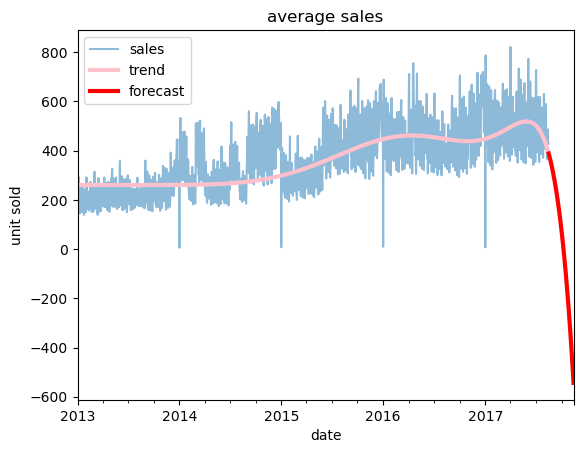

In [26]:
ax = y.plot(alpha = 0.5 , title = 'average sales', ylabel = 'unit sold')
ax = y_pred.plot(ax = ax, linewidth = 3, label = 'trend' , color = 'pink')
ax = y_fore.plot(ax = ax , linewidth = 3, label = 'forecast', color = 'red')
ax.legend()